In [ ]:
rm(list=ls())
library(keras)
library(arules)
# Multi-Layer Perceptron (MLP).
data(iris)
names(iris) <- c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")

plot(iris$Petal.Length, 
     iris$Petal.Width, 
     pch=21, bg=c("red","green3","blue")[unclass(iris$Species)], 
     xlab="Petal Length", 
     ylab="Petal Width")

head(iris)


iris[,5] <- as.numeric(iris[,5]) -1
# Turn `iris` into a matrix
iris <- as.matrix(iris)
# Set iris `dimnames` to `NULL`
dimnames(iris) <- NULL
head(iris)

set.seed(12345)
# Determine sample size
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.67, 0.33))

# Split the `iris` data
iris.training <- iris[ind==1, 1:4]
iris.test <- iris[ind==2, 1:4]

# Split the class attribute
iris.trainingtarget <- iris[ind==1, 5]
iris.testtarget <- iris[ind==2, 5]

# One hot encode training target values
iris.trainLabels <- to_categorical(iris.trainingtarget)
# One hot encode test target values
iris.testLabels <- to_categorical(iris.testtarget)
# Print out the iris.testLabels to double check the result
print(iris.testLabels)

# Initialize a sequential model
model <- keras_model_sequential() 
# Add layers to the model
model %>% 
  layer_dense(units = 8, activation = 'relu', input_shape = c(4)) %>% 
  layer_dense(units = 3, activation = 'softmax')

# Compile the model
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = 'accuracy'
)

# Fit the model 
model %>% fit(
  iris.training, 
  iris.trainLabels, 
  epochs = 200, 
  batch_size = 5, 
  validation_split = 0.2
)

# Store the fitting history in `history` 
history <- model %>% fit(
  iris.training, 
  iris.trainLabels, 
  epochs = 200,
  batch_size = 5, 
  validation_split = 0.2
)

# Plot the history
plot(history)



# Predict the classes for the test data
classes <- model %>% predict_classes(iris.test, batch_size = 128)
# Confusion matrix
table(iris.testtarget, classes)
# Evaluate on test data and labels
score <- model %>% evaluate(iris.test, iris.testLabels, batch_size = 128)
# Print the score
print(score)


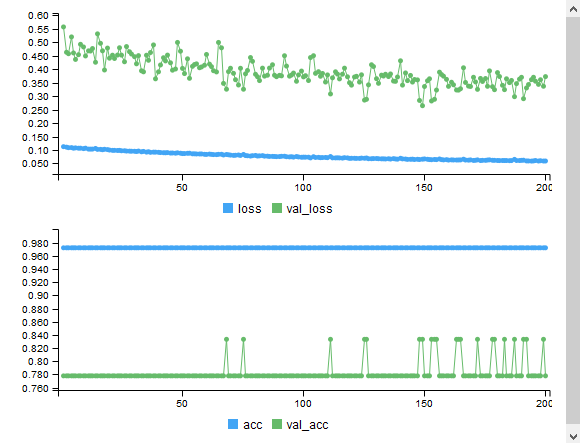

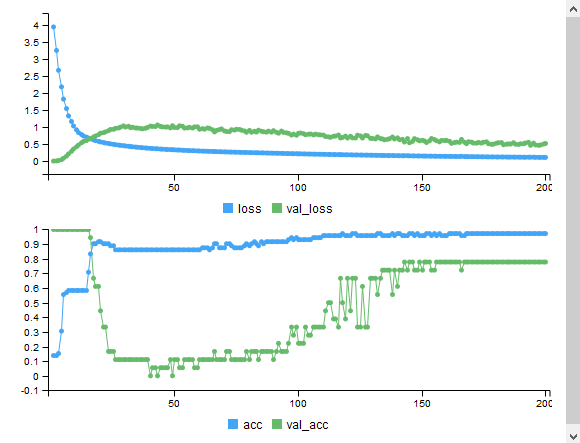